In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/property_data.csv')
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [3]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [9]:
# fungsi isnull() akan memberitahukan apakah ada data yang hilang/kosong
df['ST_NUM'].isnull() # true/false kosong/tidak

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [5]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,False,False,True
8,False,False,False,False,False,False,False


In [17]:
# kita bisa tambahkan data2 apa saja yang dianggap "missing" selain kosong beneran
missing_values = ["--","na","n/a"]
df = pd.read_csv('data/property_data.csv', na_values=missing_values)
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [18]:
df.isnull()

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,True,False,False,True,False,False
3,False,False,False,False,False,True,False
4,True,False,False,False,False,False,False
5,False,False,False,False,True,False,False
6,False,True,False,True,False,False,False
7,False,False,False,False,True,False,True
8,False,False,False,False,True,False,False


In [19]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [20]:
index_row = 0
for row in df["OWN_OCCUPIED"]:
    try:
        int(row)
        df.loc[index_row, 'OWN_OCCUPIED']=np.nan
    except ValueError:
        pass
    index_row += 1

df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [22]:
df.isnull().sum() #total data missing disini, per kolom

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [24]:
df.isnull().values.any() #true/false apakah ada data missing di sini?

True

In [25]:
df.isnull().sum().sum() #total berapa kotak yang kosong di data ini

12

In [26]:
df['ST_NUM']

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [29]:
df['ST_NUM'].fillna(125, inplace=True)

In [32]:
df['ST_NUM']

0    104.0
1    197.0
2    125.0
3    201.0
4    203.0
5    207.0
6    125.0
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [34]:
df.loc[3,'OWN_OCCUPIED'] = 'Y'
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3      Y
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [35]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [36]:
med_bedroom = df['NUM_BEDROOMS'].median()
med_bedroom


3.0

In [37]:
df['NUM_BEDROOMS'].fillna(med_bedroom, inplace=True)

In [38]:
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


In [39]:
df.loc[4,'PID'] = 100005000.0
df.head(10)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,Y,1.0,NaN,700.0
4,100005000.0,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## pakai data obes.xls

In [43]:
data_obes = pd.ExcelFile('data/obes.xls')
data_obes.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [46]:
# kita ambil satu sheet aja
data_age = data_obes.parse(u'7.2', skiprows=4, skipfooter=14)
data_age

,Unnamed: 0,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [49]:
# kita ganti nama kolom nya yang masih 'Unnamed'
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)
data_age

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [50]:
data_age.dropna(inplace=True)
data_age.head(10)

,Year,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
1,2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2,2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
3,2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
4,2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
5,2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
6,2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
7,2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
8,2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
9,2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0
10,2011/12,11736.0,495.0,391.0,1484.0,3104.0,3581.0,2119.0,468.0,94.0


In [51]:
data_age.set_index('Year', inplace=True)
data_age.head(10)

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,5018.0,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,7988.0,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,10571.0,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,11574.0,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


In [53]:
data_age.loc['2008/09', 'Under 16']

775.0

<AxesSubplot:xlabel='Year'>

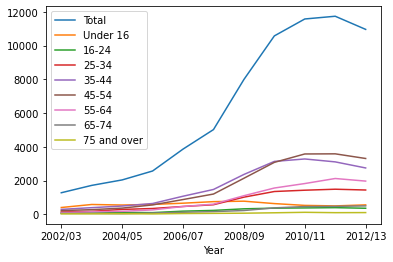

In [54]:
%matplotlib inline
data_age.plot()

In [55]:
data_age_no_total = data_age.drop('Total', axis=1)
data_age_no_total.head(10)

,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,
2002/03,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0
2007/08,747.0,228.0,564.0,1469.0,1198.0,598.0,157.0,53.0
2008/09,775.0,322.0,1013.0,2359.0,2133.0,1099.0,221.0,63.0
2009/10,632.0,361.0,1348.0,3132.0,3076.0,1555.0,378.0,87.0
2010/11,525.0,375.0,1425.0,3277.0,3573.0,1820.0,456.0,115.0


<AxesSubplot:xlabel='Year'>

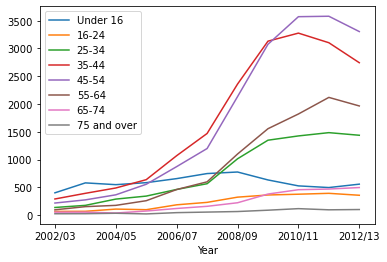

In [56]:
data_age_no_total.plot()

<AxesSubplot:xlabel='Year'>

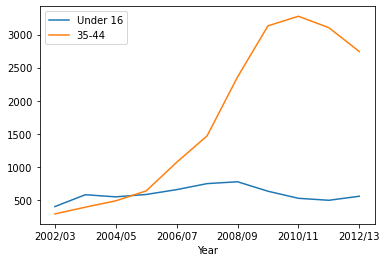

In [60]:
data_age_no_total['Under 16'].plot(label="Under 16", legend=True)
data_age_no_total['35-44'].plot(label="35-44", legend=True)

## Merapikan data tipe tanggal dan waktu

In [61]:
import datetime as datetime

In [64]:
for i in range(5, 50, 10):
    print(i)

5
15
25
35
45


In [65]:
dates = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')
dates

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [68]:
df = pd.DataFrame(dates, columns=['date'])
df.head()

,date
0,2020-01-01 00:00:00
1,2020-01-01 01:00:00
2,2020-01-01 02:00:00
3,2020-01-01 03:00:00
4,2020-01-01 04:00:00


In [69]:
df['datetime'] = pd.to_datetime(df['date'])
df.head()

,date,datetime
0,2020-01-01 00:00:00,2020-01-01 00:00:00
1,2020-01-01 01:00:00,2020-01-01 01:00:00
2,2020-01-01 02:00:00,2020-01-01 02:00:00
3,2020-01-01 03:00:00,2020-01-01 03:00:00
4,2020-01-01 04:00:00,2020-01-01 04:00:00


In [71]:
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df.head()

""
datetime
2020-01-01 00:00:00
2020-01-01 01:00:00
2020-01-01 02:00:00
2020-01-01 03:00:00
2020-01-01 04:00:00


In [72]:
df['data'] = np.random.randint(0,100,size=(len(dates)))
df.head()

,data
datetime,
2020-01-01 00:00:00,98
2020-01-01 01:00:00,19
2020-01-01 02:00:00,82
2020-01-01 03:00:00,44
2020-01-01 04:00:00,47


In [75]:
df[df.index.hour == 19]

,data
datetime,
2020-01-01 19:00:00,91
2020-01-02 19:00:00,80
2020-01-03 19:00:00,94
2020-01-04 19:00:00,88
2020-01-05 19:00:00,55
2020-01-06 19:00:00,45
2020-01-07 19:00:00,75


In [76]:
df['2020-01-05']

,data
datetime,
2020-01-05 00:00:00,11
2020-01-05 01:00:00,16
2020-01-05 02:00:00,34
2020-01-05 03:00:00,80
2020-01-05 04:00:00,58
2020-01-05 05:00:00,82
2020-01-05 06:00:00,28
2020-01-05 07:00:00,63
2020-01-05 08:00:00,33


In [78]:
# df['2020-01-05':'2020-01-06'] # bisa dicoba, ngambil range date

In [82]:
df.resample('D').mean()

,data
datetime,
2020-01-01,56.041667
2020-01-02,48.375000
2020-01-03,51.708333
2020-01-04,48.791667
2020-01-05,52.041667
2020-01-06,51.708333
2020-01-07,52.125000
2020-01-08,25.000000


In [86]:
df['rolling_sum'] = df.rolling(3).sum()
df.head(10)

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,98,NaN
2020-01-01 01:00:00,19,NaN
2020-01-01 02:00:00,82,199.0
2020-01-01 03:00:00,44,145.0
2020-01-01 04:00:00,47,173.0
2020-01-01 05:00:00,14,105.0
2020-01-01 06:00:00,53,114.0
2020-01-01 07:00:00,99,166.0
2020-01-01 08:00:00,63,215.0


In [92]:
df['rolling_sum_fill'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_sum_fill
datetime,,,
2020-01-01 00:00:00,98,NaN,199.0
2020-01-01 01:00:00,19,NaN,199.0
2020-01-01 02:00:00,82,199.0,199.0
2020-01-01 03:00:00,44,145.0,145.0
2020-01-01 04:00:00,47,173.0,173.0


## latihan datetime menggunakan dataset opsd_germany_daily

In [96]:
opsd_daily = pd.read_csv('data/opsd_germany_daily.csv')
print(opsd_daily.shape)
print(opsd_daily.head(3))
print(opsd_daily.tail(3))

(4383, 5)
         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
            Date  Consumption     Wind   Solar  Wind+Solar
4380  2017-12-29   1295.08753  584.277  29.854     614.131
4381  2017-12-30   1215.44897  721.247   7.467     728.714
4382  2017-12-31   1107.11488  721.176  19.980     741.156


In [97]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [98]:
opsd_daily['Datetime'] = pd.to_datetime(opsd_daily['Date'])
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   object        
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
 5   Datetime     4383 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 205.6+ KB


In [100]:
opsd_daily.drop(['Date'], axis=1, inplace=True)
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Consumption  4383 non-null   float64       
 1   Wind         2920 non-null   float64       
 2   Solar        2188 non-null   float64       
 3   Wind+Solar   2187 non-null   float64       
 4   Datetime     4383 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [101]:
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar,Datetime
0,1069.184,NaN,NaN,NaN,2006-01-01
1,1380.521,NaN,NaN,NaN,2006-01-02
2,1442.533,NaN,NaN,NaN,2006-01-03


In [102]:
opsd_daily.set_index('Datetime', inplace=True)
opsd_daily.head(3)

,Consumption,Wind,Solar,Wind+Solar
Datetime,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [104]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday'] = opsd_daily.index.weekday
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Datetime,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [105]:
opsd_daily.loc['2017-08-10']

Consumption    1351.491
Wind            100.274
Solar            71.160
Wind+Solar      171.434
Year           2017.000
Month             8.000
Weekday           3.000
Name: 2017-08-10 00:00:00, dtype: float64

In [106]:
opsd_daily.loc['2017-08-10':'2017-08-16']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Datetime,,,,,,,
2017-08-10,1351.491,100.274,71.160,171.434,2017,8,3
2017-08-11,1329.039,108.577,42.198,150.775,2017,8,4
2017-08-12,1121.458,305.908,80.906,386.814,2017,8,5
2017-08-13,1025.070,101.266,141.157,242.423,2017,8,6
2017-08-14,1305.341,136.416,201.027,337.443,2017,8,0
2017-08-15,1333.398,182.064,172.205,354.269,2017,8,1
2017-08-16,1364.029,68.592,150.677,219.269,2017,8,2


In [129]:
# selain slice per index, atau per range index, karena sudah datetime kita bisa ambil per tahun-bulan tertentu
opsd_daily['2017-08']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Datetime,,,,,,,
2017-08-01,1364.81900,100.080,159.889,259.969,2017,8,1
2017-08-02,1365.73500,103.491,165.591,269.082,2017,8,2
2017-08-03,1389.44500,402.361,120.167,522.528,2017,8,3
2017-08-04,1349.42300,455.379,145.631,601.010,2017,8,4
2017-08-05,1130.13400,232.881,148.611,381.492,2017,8,5
2017-08-06,1024.32400,168.420,164.458,332.878,2017,8,6
2017-08-07,1302.06200,123.843,216.117,339.960,2017,8,0
2017-08-08,1343.89900,247.468,143.742,391.210,2017,8,1
2017-08-09,1342.43200,208.824,169.034,377.858,2017,8,2


<AxesSubplot:xlabel='Datetime'>

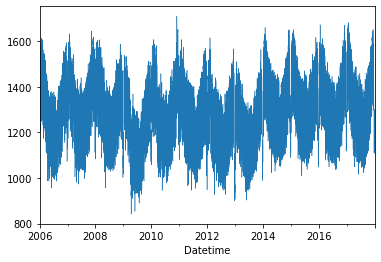

In [111]:
# kita plot datanya
opsd_daily['Consumption'].plot(linewidth=0.5)

<AxesSubplot:xlabel='Datetime'>

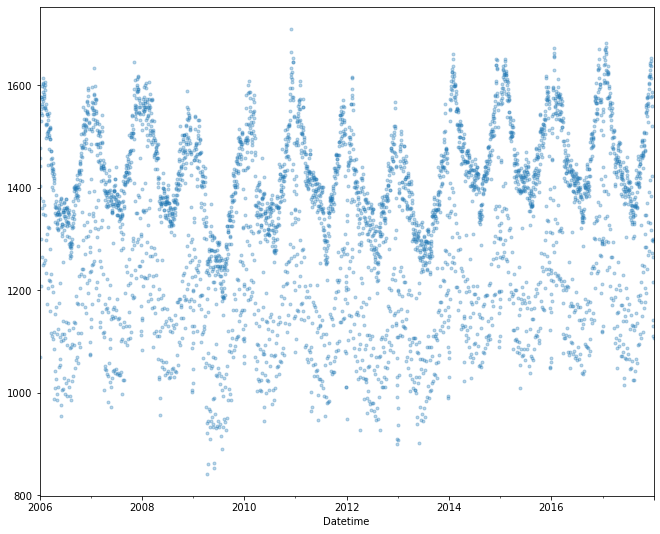

In [125]:
opsd_daily['Consumption'].plot(linestyle='None', marker='.', alpha=0.3, figsize=(11,9))

<AxesSubplot:xlabel='Datetime'>

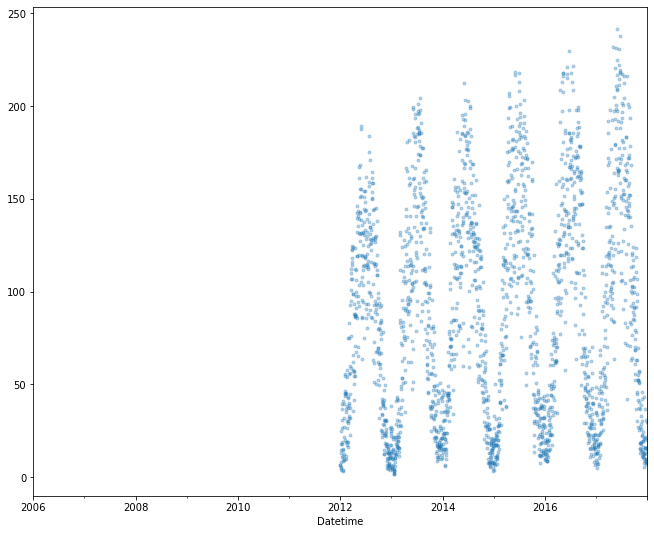

In [126]:
opsd_daily['Solar'].plot(linestyle='None', marker='.', alpha=0.3, figsize=(11,9))

<AxesSubplot:xlabel='Datetime'>

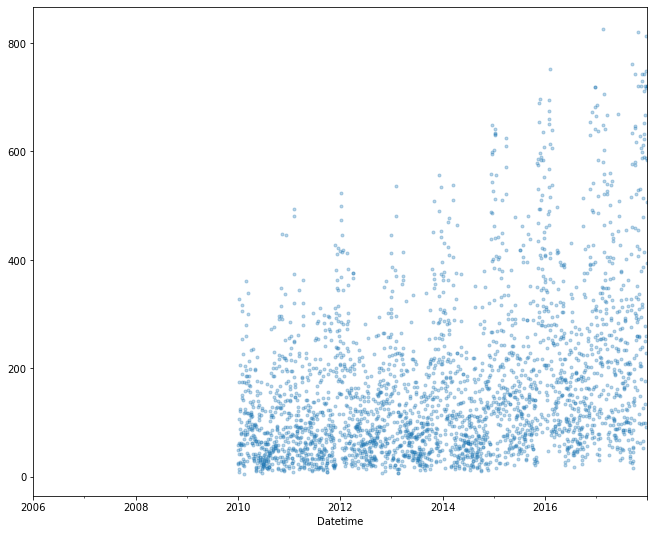

In [127]:
opsd_daily['Wind'].plot(linestyle='None', marker='.', alpha=0.3, figsize=(11,9))

<AxesSubplot:xlabel='Datetime'>

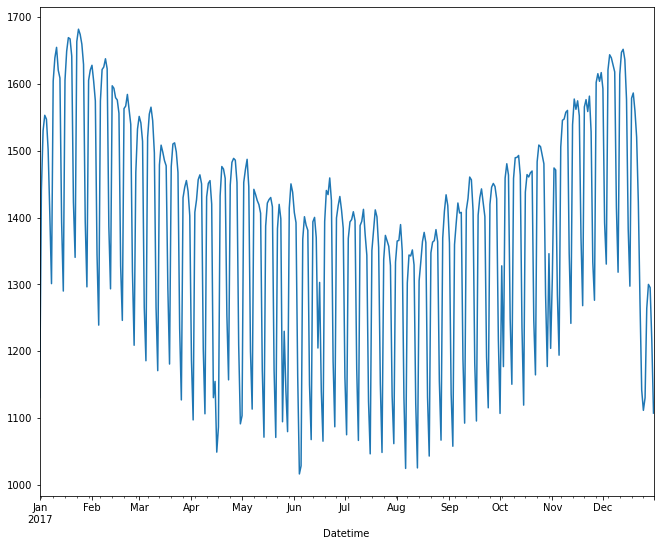

In [134]:
data_2017 = opsd_daily.loc['2017', 'Consumption']
data_2017.plot(figsize=(11,9))

In [136]:
data_2017_janfeb = opsd_daily.loc['2017-01':'2017-02', 'Consumption']
print(data_2017_janfeb.head())
print(data_2017_janfeb.tail())

Datetime
2017-01-01    1130.413
2017-01-02    1441.052
2017-01-03    1529.990
2017-01-04    1553.083
2017-01-05    1547.238
Name: Consumption, dtype: float64
Datetime
2017-02-24    1539.603
2017-02-25    1319.075
2017-02-26    1208.725
2017-02-27    1467.695
2017-02-28    1532.536
Name: Consumption, dtype: float64


<AxesSubplot:xlabel='Datetime'>

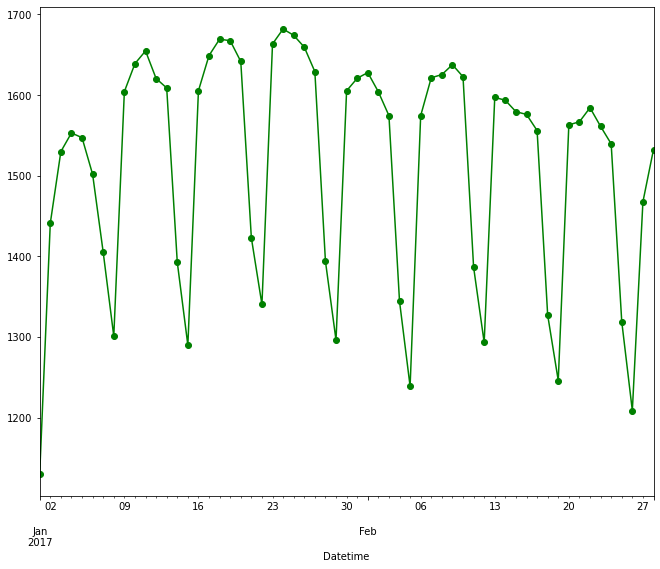

In [142]:
data_2017_janfeb.plot(marker="o", figsize=(11,9), color="green")

<AxesSubplot:title={'center':'Consumption'}, xlabel='Month'>

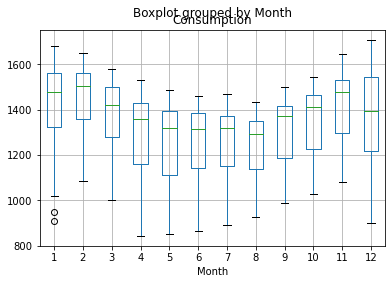

In [145]:
# setelah melihat lebih detail: per semua, lalu per tahun, lalu per 2 bulan skr kita masuk ke per bulan lagi, pakai boxplot tapi
opsd_daily.boxplot(column=['Consumption'], by='Month')

<AxesSubplot:title={'center':'Solar'}, xlabel='Month'>

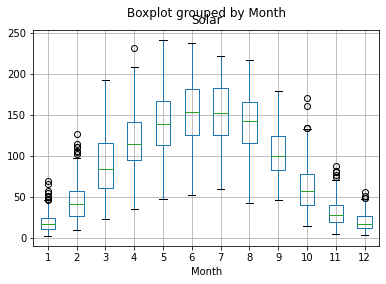

In [146]:
opsd_daily.boxplot(column=['Solar'], by='Month')

<AxesSubplot:title={'center':'Wind'}, xlabel='Month'>

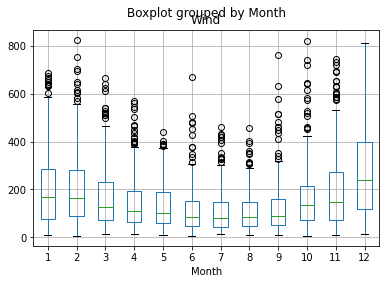

In [147]:
opsd_daily.boxplot(column=['Wind'], by='Month')

<AxesSubplot:title={'center':'Consumption'}, xlabel='Weekday'>

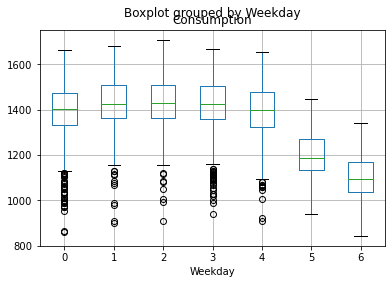

In [163]:
opsd_daily.boxplot(column=['Consumption'], by='Weekday')

In [152]:
data_cols = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_weekly_mean = opsd_daily[data_cols].resample('W').mean()
print(opsd_weekly_mean.head(3))
print(opsd_weekly_mean.tail(3))

            Consumption  Wind  Solar  Wind+Solar
Datetime                                        
2006-01-01  1069.184000   NaN    NaN         NaN
2006-01-08  1381.300143   NaN    NaN         NaN
2006-01-15  1486.730286   NaN    NaN         NaN
            Consumption        Wind      Solar  Wind+Solar
Datetime                                                  
2017-12-17  1543.856889  442.531857  18.143714  460.675571
2017-12-24  1440.342401  339.018429   9.895143  348.913571
2017-12-31  1203.265211  604.699143  19.240143  623.939286


<AxesSubplot:xlabel='Datetime'>

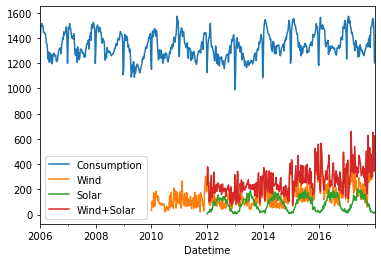

In [153]:
opsd_weekly_mean.plot()

<AxesSubplot:xlabel='Datetime'>

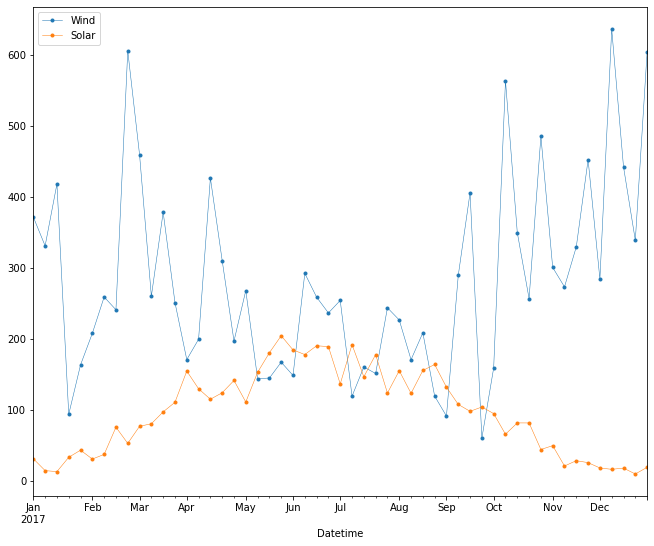

In [159]:
data_cols = ['Wind', 'Solar']
opsd_weekly_mean = opsd_daily[data_cols].resample('W').mean()
# opsd_weekly_mean.plot(marker=".", linewidth=0.5, figsize=(11,9))
opsd_weekly_mean.loc['2017-01':'2017-12', data_cols].plot(marker=".", linewidth=0.5, figsize=(11,9))

<AxesSubplot:xlabel='Datetime'>

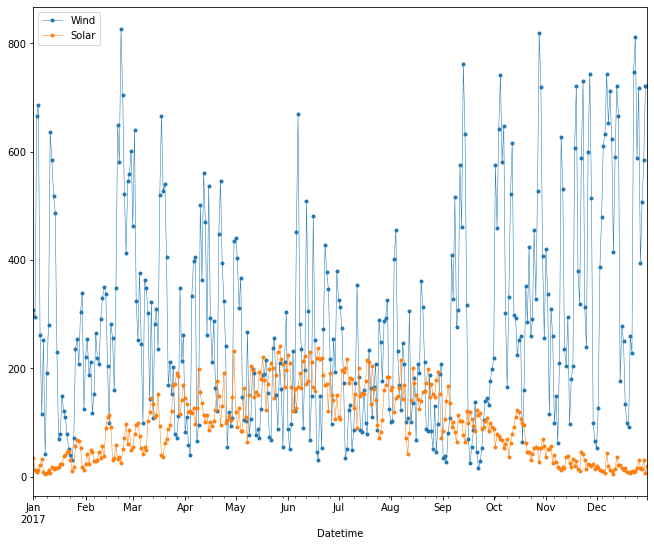

In [160]:
opsd_daily.loc['2017-01':'2017-12', data_cols].plot(marker=".", linewidth=0.5, figsize=(11,9))